In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install SimpleITK

     |████████████████████████████████| 42.5MB 214kB/s 


In [0]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [0]:
# Import t2 nifti file
root_dir = Path.cwd().parent
t2_path = root_dir.joinpath('/content/drive/My Drive/ProstrateX2/Dataset/Training/generated/nifti/ProstateX-0002/t2/4_t2_tse_tra.nii.gz')
t2_original = sitk.ReadImage(str(t2_path))

In [0]:
# Convert to numpy array
t2_original_np = sitk.GetArrayFromImage(t2_original)

# Get a slice of the array (10th slice)
t2_slice_original = t2_original_np[2,:,:]

## 2DFFT

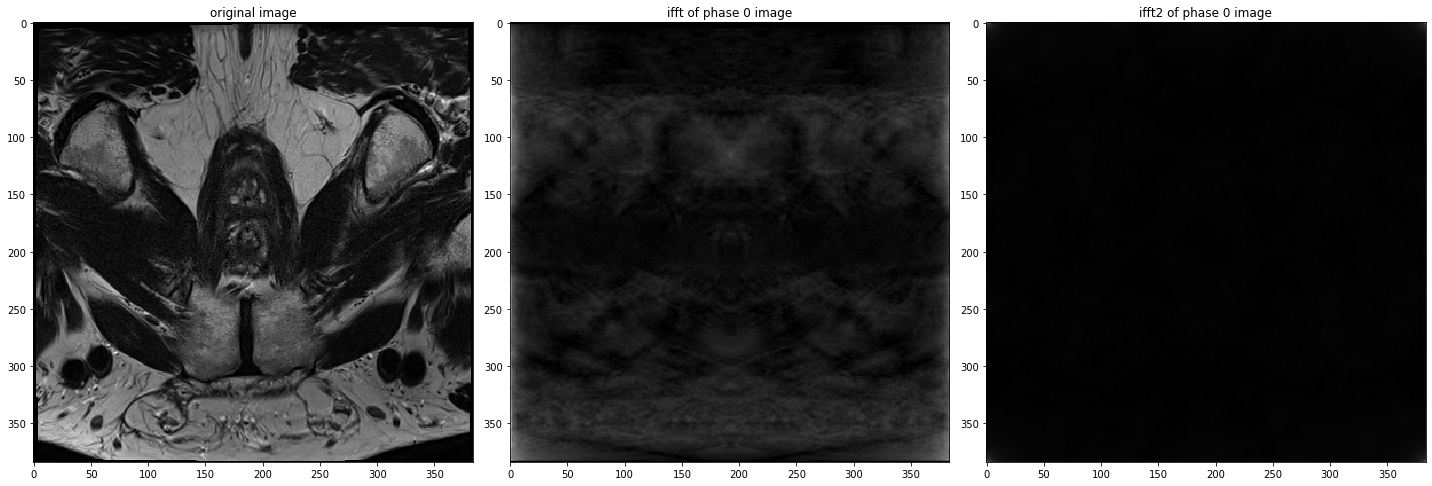

In [8]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.title('original image')
plt.imshow(t2_slice_original, cmap = 'gray')

plt.subplot(1,3,2)
ft_t2_slice = np.fft.fft(t2_slice_original)
magnitude = np.abs(ft_t2_slice) # has the same magnitude as ft_t2_slice; 0 phase
inverse = np.fft.ifft(magnitude)
plt.title('ifft of phase 0 image')
plt.imshow(np.abs(inverse), cmap = 'gray')

plt.subplot(1,3,3)
ft_t2_slice = np.fft.fft2(t2_slice_original)
magnitude = np.abs(ft_t2_slice) # has the same magnitude as ft_t2_slice; 0 phase
inverse = np.fft.ifft2(magnitude)
plt.title('ifft2 of phase 0 image')
plt.imshow(np.abs(inverse), cmap = 'gray')
plt.tight_layout()

plt.show()

### Plotting fftshift

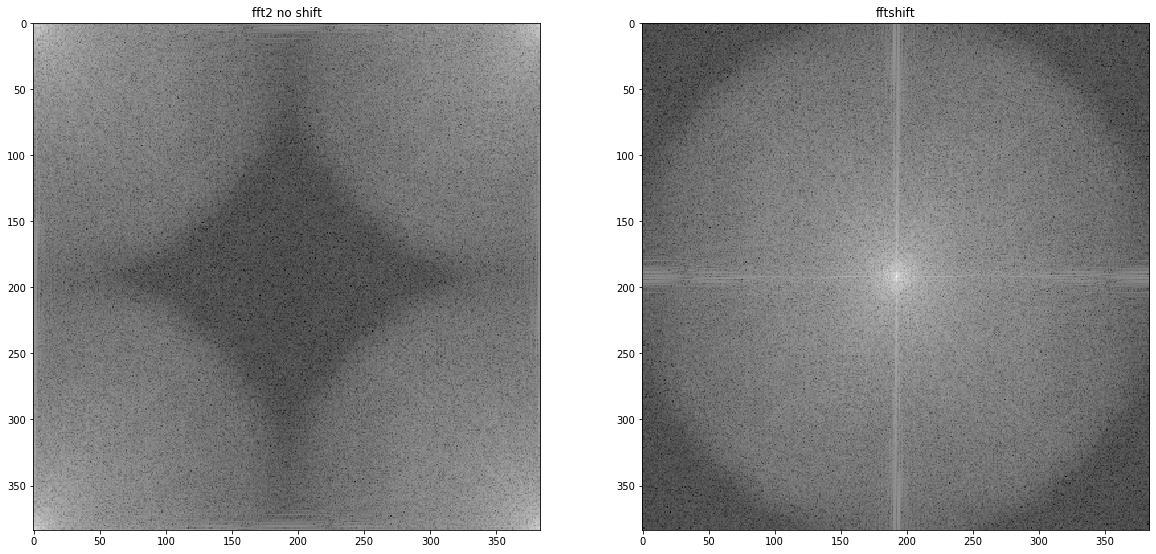

In [9]:
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
ft_t2_slice = np.fft.fft2(t2_slice_original)
plt.title('fft2 no shift')
plt.imshow(np.log(np.abs(ft_t2_slice)), cmap = 'gray')

plt.subplot(1,2,2)
ft_t2_slice = np.fft.fft2(t2_slice_original)
ft_t2_slice = np.fft.fftshift(ft_t2_slice)
plt.title('fftshift')
plt.imshow(np.log(np.abs(ft_t2_slice)), cmap = 'gray')

plt.show()